In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append('..')
sys.path.append('../src')
import os
from os.path import join as oj
import numpy as np
from copy import deepcopy
import pandas as pd
import data
# import models
import pickle as pkl
# from style import *
import viz
from viz import *
import config
outcome_def = 'y_consec_thresh'

In [2]:
df = data.get_data(use_processed=True) #, dset='orig') # all_data=True
dfv = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots

**plot curves**

/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


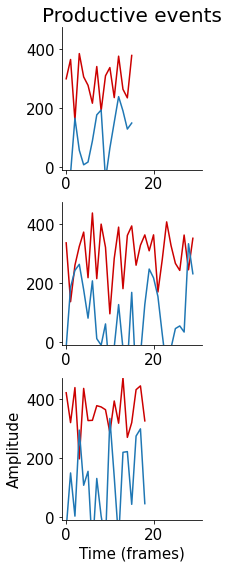

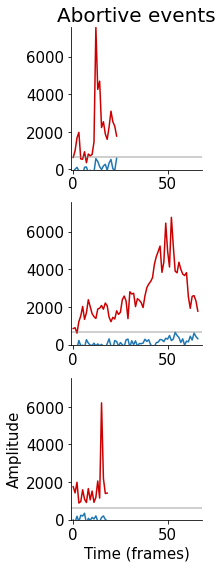

In [3]:
plt.figure(figsize=(3, 8))
R, C = 3, 1
dfv_minus = dfv[dfv[outcome_def] == 0].sort_values('X_max')
viz.plot_curves(dfv_minus, R=R, C=C, fig=True, ylim_constant=True, legend=False)
plt.xlabel('Time (frames)')
plt.ylabel('Amplitude')
plt.subplot(R, C, 1)
# plt.title('A', loc='left', fontweight='bold')
plt.title('Productive events')
plt.tight_layout()
plt.savefig('figs/fig_traces_minus.pdf')

plt.figure(figsize=(3, 8))
dfv_plus = dfv[dfv[outcome_def] == 0].sort_values('X_max', ascending=False)
viz.plot_curves(dfv_plus, R=R, C=C, fig=True, ylim_constant=True, legend=False)
plt.xlabel('Time (frames)')
plt.ylabel('Amplitude')
plt.subplot(R, C, 1)
# plt.title('B', loc='left', fontweight='bold')
plt.title('Abortive events')
plt.tight_layout()
plt.savefig('figs/fig_traces_plus.pdf')

**plot a column of curves**

In [ ]:
plt.figure(figsize=(3, 7))
viz.plot_curves(df, R=3, C=1, fig=True)
plt.xlabel('Time (frames)')
plt.savefig('figs/fig_traces_column.pdf')

# viz hists

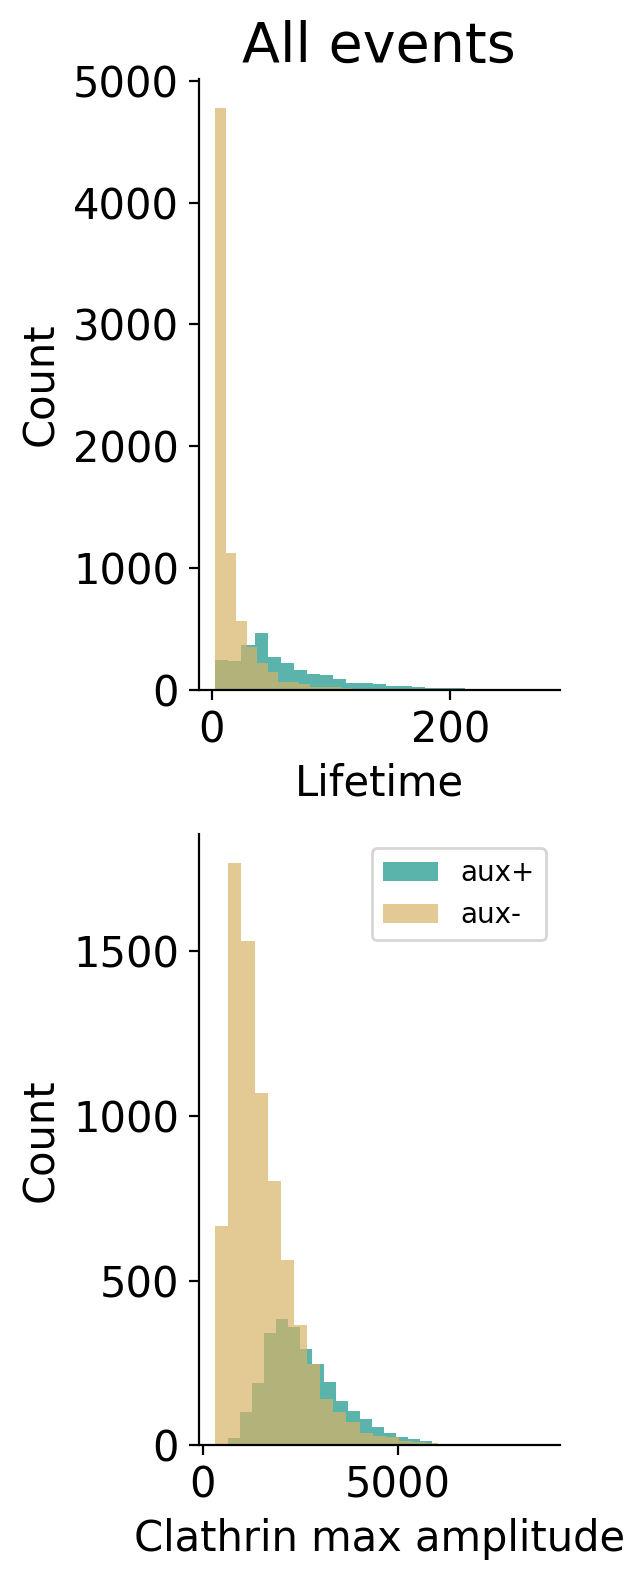

In [5]:
outcome = df[outcome_def]
R, C = 2, 1


plt.figure(figsize=(3, 8), dpi=200)
plt.subplot(R, C, 1)
# plt.title('C', loc='left', fontweight='bold')
plt.title('All events')
plt.hist(df['lifetime'][outcome == 1], label='aux+', alpha=1, color=cg, bins=25)
plt.hist(df['lifetime'][outcome == 0], label='aux-', alpha=0.7, color=cy, bins=25)
plt.xlabel('Lifetime')
plt.ylabel('Count')

plt.subplot(R, C, 2)
plt.hist(df['X_max'][outcome == 1], label='aux+', alpha=1, color=cg, bins=25)
plt.hist(df['X_max'][outcome == 0], label='aux-', alpha=0.7, color=cy, bins=25)
plt.xlabel('Clathrin max amplitude')
plt.ylabel('Count')

'''
plt.subplot(R, C, 3)
plt.hist(df['fall'][outcome == 1], label='aux+', alpha=1, color=cb, bins=25)
plt.hist(df['fall'][outcome == 0], label='aux-', alpha=0.7, color=cr, bins=25)
plt.xlabel('Fall')
plt.ylabel('Count')
'''
plt.legend()
plt.tight_layout()

plt.savefig('figs/fig_hists.pdf')
plt.show()

# dset sizes

In [83]:
viz.print_metadata(acc=None, metadata_file='processed/metadata_clath_aux.pkl')

valid:		15356 aux+ / 50595 (0.304)
----------------------------------------
hotspots:	 879 aux+ /  879
short:		13046 aux+ / 58124 (0.776)
long:		  92 aux+ /   92 (1.000)
hard:		4875 aux+ / 7002 (0.696)

lifetime threshes 15 161


In [85]:
df_test = df[df.cell_num.isin(config.SPLITS['orig']['test'])]

In [88]:
print('valid', df_test.shape[0], df_test[outcome_def].sum())

valid 2497 561.0


In [91]:
d = df_test[~df_test['short'] & ~df_test['long']]
print('difficult', d.shape[0], d[outcome_def].sum())

difficult 1045 469.0
